# Introduction (change)

In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [ ]:
# download twitter sample dataset
nltk.download('twitter_samples')

In [3]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [4]:
# the number of positive and negative tweets
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all positive tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all positive tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


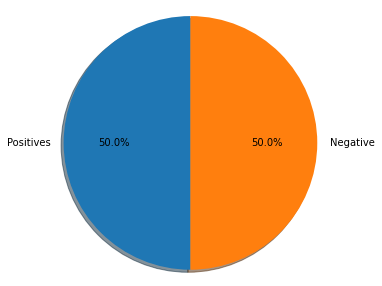

In [5]:
### Simple visualisation

# Declare a figure with a custom soze
fig = plt.figure(figsize=(5, 5))

# Labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)]

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

In [6]:
### Looking at raw texts

# print positive in green
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
'\033[91m' + all_negative_tweets[random.randint(0,5000)]

Hello @tabithahoy :) We are now your ardent followers!  https://t.co/JuzrBE0SBt


'\x1b@KadiDiallo4 thats it! Watch it go by quick though.. :('

### Preprocess raw text for Sentiment analysis

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

The videos explained each of these steps and why they are important. Let's see how we can do these to a given tweet. We will choose just one and see how this is transformed by each preprocessing step.

In [7]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [8]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexmaszanski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

### Remove hyperlinks,  Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

In [10]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [11]:
### Tokenize the string

from sre_parse import Tokenizer


print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, 
                            strip_handles=True,
                            reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [12]:
### Remove stop words and punctuations

# Import the english stop words from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [13]:
### Time to clean up our tokenized tweet!
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and # remove stopwords
        word not in string.punctuation): # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation: ')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation: 
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.
 
NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/). Let's see how we can use it in the cell below.

In [14]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

# Instatiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word) # stemming word
    tweets_stem.append(stem_word) # append to the list

print('stemmed words:')
print(tweets_stem)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


That's it! Now we have a set of words we can feed into to the next stage of our machine learning project.

In [17]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

In [18]:
#from utils import process_tweet # Import the process_tweet function

# choose the same tweet
tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


That's it for this lab! You now know what is going on when you call the preprocessing helper function in this week's assignment. Hopefully, this exercise has also given you some insights on how to tweak this for other types of text datasets.

# Building and Visualizing word frequencies

In [21]:
import numpy as np

In [19]:
tweets = all_positive_tweets + all_negative_tweets
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


Next, we will build an array of labels that matches the sentiments of our tweets.  This data type works pretty much like a regular list but is optimized for computations and manipulation. The `labels` array will be composed of 10000 elements. The first 5000 will be filled with `1` labels denoting positive sentiments, and the next 5000 will be `0` labels denoting the opposite. We can do this easily with a series of operations provided by the `numpy` library:

* `np.ones()` - create an array of 1's
* `np.zeros()` - create an array of 0's
* `np.append()` - concatenate arrays

In [22]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

## Dictionaries

### Definition

In [23]:
dictionary = {'key1' : 1, 'key2' : 2}

### Adding or editing entries

In [24]:
# Add a new entry
dictionary['key3'] = -5

# Overwrite the value of key1
dictionary['key1'] = 0

print(dictionary)

{'key1': 0, 'key2': 2, 'key3': -5}


### Accessing values and lookup keys

Performing dictionary lookups and retrieval are common tasks in NLP. There are two ways to do this: 

* Using square bracket notation: This form is allowed if the lookup key is in the dictionary. It produces an error otherwise.
* Using the [get()](https://docs.python.org/3/library/stdtypes.html#dict.get) method: This allows us to set a default value if the dictionary key does not exist. 

Let us see these in action:

In [25]:
# Square bracket lookup when the key exist
print(dictionary['key2'])

2


In [26]:
# This prints a value
if 'key1' in dictionary:
    print("item found: ", dictionary['key1'])
else:
    print('key1 is not defined')

# Same as what you get with get
print("item found: ", dictionary.get('key1', -1))

item found:  0
item found:  0


In [27]:
# This prints a value
if 'key7' in dictionary:
    print("item found: ", dictionary['key1'])
else:
    print('key does not exist')

# Same as what you get with get
print(dictionary.get('ke7', -1))

key does not exist
-1


## Word frequency dictionary

```python
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs
```

You can also do the for loop like this to make it a bit more compact:

```python
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            freqs[pair] = freqs.get(pair, 0) + 1
```

In [28]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [29]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13067


In [30]:
#print(freqs) – trash, please don't uncomment this cell

## Table of word counts

In [31]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


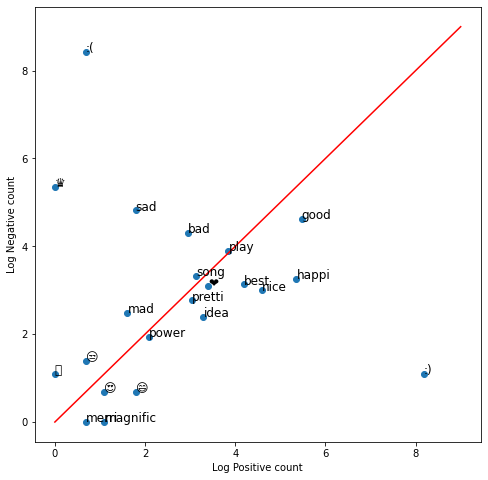

In [32]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

This chart is straightforward to interpret. It shows that emoticons `:)` and `:(` are very important for sentiment analysis. Thus, we should not let preprocessing steps get rid of these symbols!

Furthermore, what is the meaning of the crown symbol? It seems to be very negative!

# Visualizing tweets and the Logistic Regression model

**Objectives:** Visualize and interpret the logistic regression model

**Steps:**
* Plot tweets in a scatter plot using their positive and negative sums.
* Plot the output of the logistic regression model in the same plot as a solid line

# Load the extracted features

Part of this week's assignment is the creation of the numerical features needed for the Logistic regression model. In order not to interfere with it, we have previously calculated and stored these features in a CSV file for the entire training set.

So, please load these features created for the tweets sample. 

In [33]:
# split the data into two pieces, one for training and one for testing (validation set) 
train_pos  = all_positive_tweets[:4000]
train_neg  = all_negative_tweets[:4000]

train_x = train_pos + train_neg 

print("Number of tweets: ", len(train_x))

Number of tweets:  8000


In [34]:
import pandas as pd

data = pd.read_csv('.../data/logistic_features.csv.xls'); # Load a 3 columns csv file using pandas function
data.head(10) # Print the first 10 data entries

,bias,positive,negative,sentiment
0,1.0,3020.0,61.0,1.0
1,1.0,3573.0,444.0,1.0
2,1.0,3005.0,115.0,1.0
3,1.0,2862.0,4.0,1.0
4,1.0,3119.0,225.0,1.0
5,1.0,2955.0,119.0,1.0
6,1.0,3934.0,538.0,1.0
7,1.0,3162.0,276.0,1.0
8,1.0,628.0,189.0,1.0
9,1.0,264.0,112.0,1.0


Now let us get rid of the data frame to keep only Numpy arrays.

In [35]:
# Each feature is labeled as bias, positive and negative
X = data[['bias', 'positive', 'negative']].values # Get only the numerical values of the dataframe
Y = data['sentiment'].values; # Put in Y the corresponding labels or sentiments

print(X.shape) # Print the shape of the X part
print(X) # Printsome rows of X

(8000, 3)
[[1.000e+00 3.020e+03 6.100e+01]
 [1.000e+00 3.573e+03 4.440e+02]
 [1.000e+00 3.005e+03 1.150e+02]
 ...
 [1.000e+00 1.440e+02 7.830e+02]
 [1.000e+00 2.050e+02 3.890e+03]
 [1.000e+00 1.890e+02 3.974e+03]]


## Load a pretrained Logistic Regression model

In the same way, as part of this week's assignment, a Logistic regression model must be trained. The next cell contains the resulting model from such training. Notice that a list of 3 numeric values represents the whole model, that we have called _theta_ $\theta$.

In [36]:
theta = [6.03518871e-08, 5.38184972e-04, -5.58300168e-04]

## Plot the samples in a scatter plot

The vector theta represents a plane that split our feature space into two parts. Samples located over that plane are considered positive, and samples located under that plane are considered negative. Remember that we have a 3D feature space, i.e., each tweet is represented as a vector comprised of three values: `[bias, positive_sum, negative_sum]`, always having `bias = 1`. 

If we ignore the bias term, we can plot each tweet in a cartesian plane, using `positive_sum` and `negative_sum`. In the cell below, we do precisely this. Additionally, we colour each tweet, depending on its class. Positive tweets will be green and negative tweets will be red.

Text(0, 0.5, 'Negative')

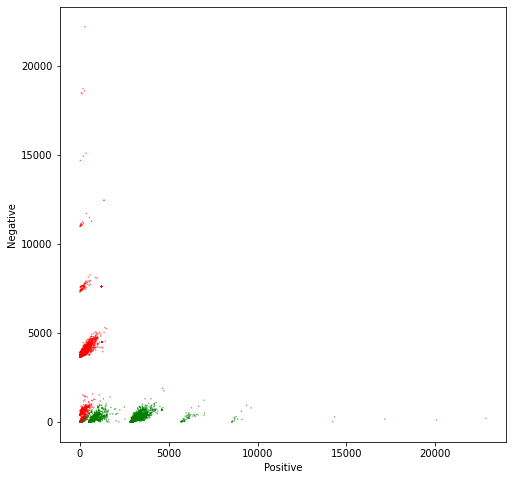

In [37]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

From the plot, it is evident that the features that we have chosen to represent tweets as numerical vectors allow an almost perfect separation between positive and negative tweets. So you can expect a very high accuracy for this model! 

## Plot the model alongside the data

We will draw a gray line to show the cutoff between the positive and negative regions. In other words, the gray line marks the line where $$ z = \theta * x = 0.$$
To draw this line, we have to solve the above equation in terms of one of the independent variables.

$$ z = \theta * x = 0$$
$$ x = [1, pos, neg] $$
$$ z(\theta, x) = \theta_0+ \theta_1 * pos + \theta_2 * neg = 0 $$
$$ neg = (-\theta_0 - \theta_1 * pos) / \theta_2 $$

The red and green lines that point in the direction of the corresponding sentiment are calculated using a perpendicular line to the separation line calculated in the previous equations (neg function). It must point in the same direction as the derivative of the Logit function, but the magnitude may differ. It is only for a visual representation of the model. 

$$direction = pos * \theta_2 / \theta_1$$

In [38]:
# Equation for the separation plane
# It give a value in the negative axe as a function of a positive value
# f(pos, neg, W) = w0 + w1 * pos + w2 * neg = 0
# s(pos, W) = (-w0 - w1 * pos) / w2
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

# Equation for the direction of the sentiments change
# We don't care about the magnitude of the change. We are only interested 
# in the direction. So this direction is just a perpendicular function to the 
# separation plane
# df(pos, W) = pos * w2 / w1
def direction(theta, pos):
    return    pos * theta[2] / theta[1]

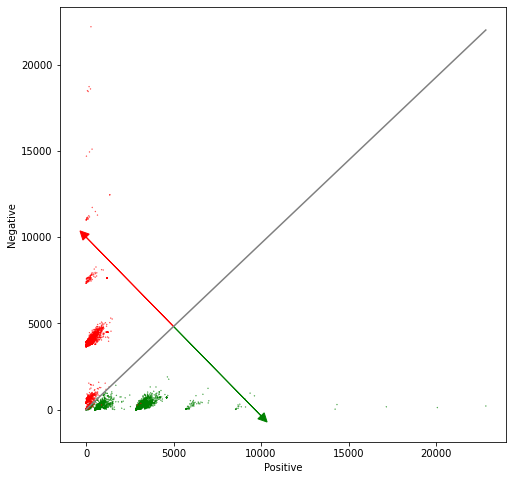

In [39]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color base on the sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

# Now lets represent the logistic regression model in this chart. 
maxpos = np.max(X[:,1])

offset = 5000 # The pos value for the direction vectors origin

# Plot a gray line that divides the 2 areas.
ax.plot([0,  maxpos], [neg(theta, 0),   neg(theta, maxpos)], color = 'gray') 

# Plot a green line pointing to the positive direction
ax.arrow(offset, neg(theta, offset), offset, direction(theta, offset), head_width=500, head_length=500, fc='g', ec='g')
# Plot a red line pointing to the negative direction
ax.arrow(offset, neg(theta, offset), -offset, -direction(theta, offset), head_width=500, head_length=500, fc='r', ec='r')

plt.show()

**Note that more critical than the Logistic regression itself, are the features extracted from tweets that allow getting the right results in this exercise.**

That is all, folks. Hopefully, now you understand better what the Logistic regression model represents, and why it works that well for this specific problem. 